In [1]:
using Pkg;
Pkg.activate(".");
Pkg.instantiate();

 Activating environment at `~/Documents/GitHub/NNtutorial/Project.toml`


In [2]:
using LinearAlgebra, DataFrames, Plots, StatsPlots, LaTeXStrings; pyplot();

In [3]:
f(x) = 1.2 * (x-2)^2 + 3.2;
f_cost(x) = 1.2 * 2 * (x-2);

In [4]:
x_vals = 0.0:0.01:4;
y_vals = [f(x) for x in x_vals];

In [5]:
function graddesc(x,α,j)
    xtrace = zeros(j);
    xtrace[1] = x;
    ftrace = zeros(j);
    ftrace[1] = f(x);
    for i in 1:j-1
        xtrace[i+1] = xtrace[i] - α*f_cost(xtrace[i]);
        ftrace[i+1] = f(xtrace[i+1])
    end
    DF = DataFrame(x=xtrace,f_x=ftrace)
    return DF
end

graddesc (generic function with 1 method)

In [6]:
DF1 = graddesc(0.1,0.1,100);

In [7]:
first(DF1,5)

,x,f_x
,Float64,Float64
1,0.1,7.532
2,0.556,5.70216
3,0.90256,4.64525
4,1.16595,4.03478
5,1.36612,3.68217


In [8]:
last(DF1,5)

,x,f_x
,Float64,Float64
1,2.0,3.2
2,2.0,3.2
3,2.0,3.2
4,2.0,3.2
5,2.0,3.2


In [9]:
DF2 = graddesc(0.1,0.6,100);

In [10]:
first(DF2,5)

,x,f_x
,Float64,Float64
1,0.1,7.532
2,2.836,4.03868
3,1.63216,3.36237
4,2.16185,3.23143
5,1.92879,3.20609


In [11]:
last(DF2,5)

,x,f_x
,Float64,Float64
1,2.0,3.2
2,2.0,3.2
3,2.0,3.2
4,2.0,3.2
5,2.0,3.2


In [12]:
DF3 = graddesc(0.1,0.8,100);

In [13]:
first(DF3,5)

,x,f_x
,Float64,Float64
1,0.1,7.532
2,3.748,6.8666
3,0.39184,6.30341
4,3.47951,5.82673
5,0.638853,5.42326


In [14]:
last(DF3,5)

,x,f_x
,Float64,Float64
1,2.00069,3.2
2,1.99937,3.2
3,2.00058,3.2
4,1.99946,3.2
5,2.00049,3.2


In [15]:
p1=plot(x_vals,y_vals,legend=false);
@df DF1 plot!(p1,:x,:f_x,m=:dot);
plot!(p1,title=L"\alpha = 0.1");

In [16]:
p2=plot(x_vals,y_vals,legend=false);
@df DF2 plot!(p2,:x,:f_x,m=:dot);
plot!(p2,title=L"\alpha = 0.6");

In [17]:
p3=plot(x_vals,y_vals,legend=false);
@df DF3 plot!(p3,:x,:f_x,m=:dot);
plot!(p3,title=L"\alpha = 0.8");

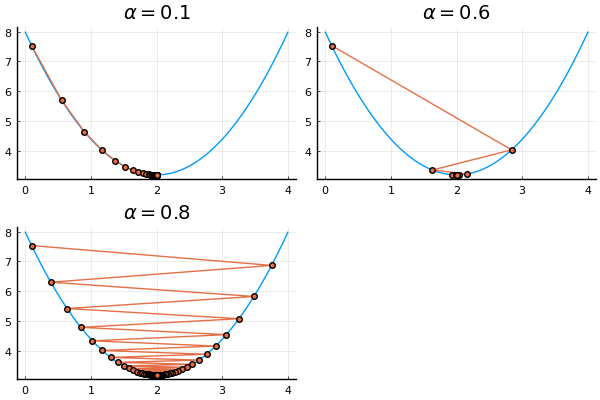

In [18]:
plot(p1,p2,p3)

In [21]:
#p = plot(x_vals,y_vals,legend=false,title=L"\alpha = 0.1");
#anim = @animate for i ∈ 1:nrow(DF1)
#    plot!(p,DF1[1:i,1],DF1[1:i,2],m=:dot);
#end
#gif(anim, "anim_fps10_01.gif", fps = 10);

In [22]:
#p = plot(x_vals,y_vals,legend=false,title=L"\alpha = 0.6");
#anim = @animate for i ∈ 1:nrow(DF2)
#    plot!(p,DF2[1:i,1],DF2[1:i,2],m=:dot);
#end
#gif(anim, "anim_fps10_02.gif", fps = 10);

In [21]:
#p = plot(x_vals,y_vals,legend=false,title=L"\alpha = 0.8");
#anim = @animate for i ∈ 1:nrow(DF3)
#    plot!(p,DF3[1:i,1],DF3[1:i,2],m=:dot);
#end
#gif(anim, "anim_fps10_03.gif", fps = 10);